In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV


bank_data = pd.read_csv('datasets/bank-additional/bank-additional-full.csv', sep=';')
# bank_data = pd.read_csv('datasets/bank-additional/bank-additional.csv', sep=';')
bank_data['labels'] = bank_data['y'].apply(lambda x: 0 if x == 'no' else 1)

#  Change no to unknown
#  Categorical Data
catg_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
bank_data_catg = bank_data[catg_col]
bank_data_catg['housing'] = bank_data_catg['housing'].apply(lambda x: 'no' if x == 'unknown' else x)
bank_data_catg['loan'] = bank_data_catg['loan'].apply(lambda x: 'no' if x == 'unknown' else x)
bank_data_catg['default'] = bank_data_catg['default'].apply(lambda x: 'no' if x == 'unknown' else x)

job_encoder = OneHotEncoder()
bank_catg_onehot = job_encoder.fit_transform(bank_data_catg)

numerical_col = list(set(bank_data.drop(['y','labels'],axis=1).columns) - set(catg_col))
scaling = StandardScaler()
bank_numer = bank_data[numerical_col]
bank_numer_scaled = scaling.fit_transform(bank_numer)

# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


random_state=42
features = np.concatenate((bank_numer_scaled ,bank_catg_onehot.toarray()),axis=1)
labels = bank_data['labels']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=random_state)
X_train_real, X_validation, y_train_real, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=random_state)

C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [130]:
from sklearn.metrics import homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score
def get_all_cluster_metric_score(predict_value, real_value):
    homo_scr = homogeneity_score(real_value, predict_value)
    vm_scr = v_measure_score(real_value, predict_value)
    complete_scr = completeness_score(real_value, predict_value)
    adrand_scr = adjusted_rand_score(real_value, predict_value)
    print("SCORE")
    print("Homogenity:", homo_scr)
    print("V Measure:", vm_scr)
    print("Completeness:", complete_scr)
    print("Adjusted RandIndex:", adrand_scr)


In [2]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
bank_data['labels'].value_counts(1)

0    0.887346
1    0.112654
Name: labels, dtype: float64

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# k = 5
kmean_clfs_n = []
range_loop = range(2, 30)
for i in range_loop:
#     print("K", i)
    kmean = KMeans(n_clusters=i , random_state=random_state)
    kmean.fit(X_train)
    kmean_clfs_n.append(kmean)


No handles with labels found to put in legend.


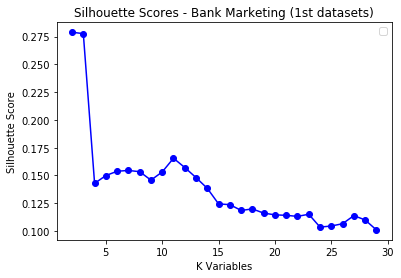

In [112]:
# Silhouette_schore
silhouette = [silhouette_score(X_train, i.labels_) for i in kmean_clfs_n]
inertia = [ i.inertia_ for i in kmean_clfs_n]
fig, ax = plt.subplots()
ax.plot(range_loop , silhouette, "b-o")
ax.set_xlabel('K Variables')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores - Bank Marketing (1st datasets)')
ax.legend()
plt.show(fig)

No handles with labels found to put in legend.


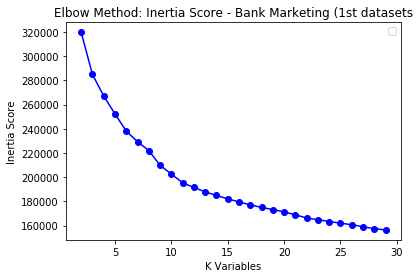

In [111]:
# Elbow Method
fig, ax = plt.subplots()
ax.plot(range_loop , inertia, "b-o")
ax.set_xlabel('K Variables')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method: Inertia Score - Bank Marketing (1st datasets')
ax.legend()
plt.show(fig)

In [138]:
# Does Cluster align with your label?, so we choose K according to silhouette score
# K = 2 is the highest since it cannot be distinguish by using elbow method (No elbow visually occurs!!)
from sklearn.metrics import homogeneity_score, v_measure_score, completeness_score

# Kmean
fin_kmeans = KMeans(n_clusters=8, random_state=random_state)
y_pred_kmeans = fin_kmeans.fit_predict(X_train)

get_all_cluster_metric_score(y_pred_kmeans, y_train)
# a very low 

SCORE
Homogenity: 0.1779461200624513
V Measure: 0.05588358119223229
Completeness: 0.03314659811397131
Adjusted RandIndex: 0.021837062922844413


In [134]:
# silhouette score
fin_kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred_kmeans = fin_kmeans.fit_predict(X_train)

get_all_cluster_metric_score(y_pred_kmeans, y_train)

SCORE
Homogenity: 0.1553100698155113
V Measure: 0.09928553528160482
Completeness: 0.07296506629250912
Adjusted RandIndex: 0.16262715134726813


In [135]:
# silhouette score
fin_kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred_kmeans = fin_kmeans.fit_predict(X_train)

get_all_cluster_metric_score(y_pred_kmeans, y_train)

SCORE
Homogenity: 0.11253794398204998
V Measure: 0.08039748428467998
Completeness: 0.06253709850694235
Adjusted RandIndex: 0.1313977682666897


### EM

In [125]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=random_state)
gm.fit(features)

gm_clfs_n = []
range_loop = range(2, 25)
for i in range_loop:
#     print("K", i)
    gm = GaussianMixture(n_components=i , random_state=random_state)
    gm.fit(X_train)
    gm_clfs_n.append(gm)

# Silhouette_schore

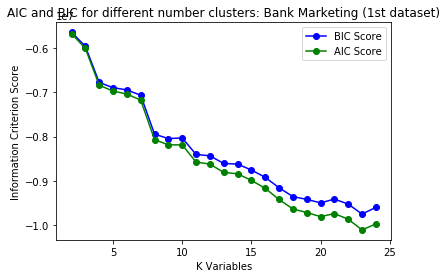

In [126]:
bic_score = [i.bic(X_train) for i in gm_clfs_n]
aic_score = [i.aic(X_train) for i in gm_clfs_n]
fig, ax = plt.subplots()
ax.plot(range_loop , bic_score, "b-o", label='BIC Score')
ax.plot(range_loop , aic_score, "g-o", label='AIC Score')
ax.set_xlabel('K Variables')
ax.set_ylabel('Information Criterion Score')
ax.set_title('AIC and BIC for different number clusters: Bank Marketing (1st dataset)')
ax.legend()
plt.show(fig)

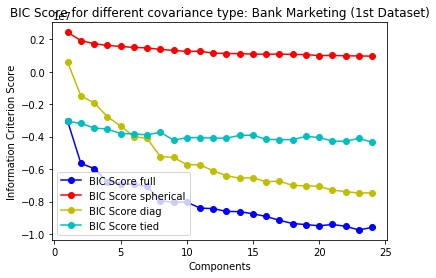

In [139]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=random_state)
gm.fit(features)

gm_clfs_n = []
range_loop = range(1, 25)
fig, ax = plt.subplots()

color = ['b-o', 'r-o', 'y-o', 'c-o', 'm-o', 'k-o']
k = 0
for i in ['full', 'spherical', 'diag', 'tied']:
    bic_score_list = []
    for j in range_loop:
        gm = GaussianMixture(n_components=j , random_state=random_state, covariance_type=i)
        gm.fit(X_train)
        bic_score = gm.bic(X_train)
        bic_score_list.append(bic_score)
    ax.plot(range_loop , bic_score_list, color[k], label=f'BIC Score {i}')
    k = k+1
    
ax.set_xlabel('Components')
ax.set_ylabel('Information Criterion Score')
ax.set_title('BIC Score for different covariance type: Bank Marketing (1st Dataset)')
ax.legend()
plt.show(fig)
# Silhouette_schore

In [143]:
gm = GaussianMixture(n_components=23, random_state=random_state)
gm.fit(features)

y_pred_gmm = gm.predict(X_train)

get_all_cluster_metric_score(y_pred_gmm, y_train)
print(gm.converged_)

SCORE
Homogenity: 0.1949975140065378
V Measure: 0.04337057481938705
Completeness: 0.024398608329255098
Adjusted RandIndex: 0.012139442160047777
True


### PCA

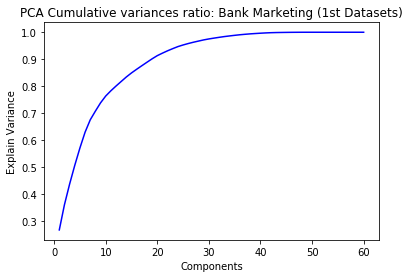

In [204]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
transformed = pca.transform(X_train)

fig, ax = plt.subplots()
ax.plot(range(1, pca.n_components_ +1) , np.cumsum(pca.explained_variance_ratio_), "b-")
# ax.plot(range_loop , aic_score, "g-", label='AIC Score')
ax.set_xlabel('Components')
ax.set_ylabel('Explain Variance')
ax.set_title('PCA Cumulative variances ratio: Bank Marketing (1st Datasets)')
# ax.legend()
plt.show(fig)

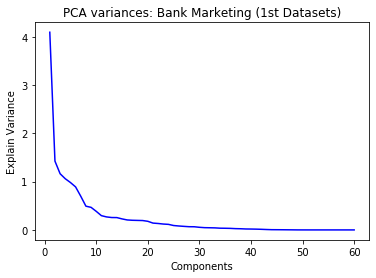

In [205]:
fig, ax = plt.subplots()
ax.plot(range(1, pca.n_components_ +1) , pca.explained_variance_, "b-")
# ax.plot(range_loop , aic_score, "g-", label='AIC Score')
ax.set_xlabel('Components')
ax.set_ylabel('Explain Variance')
ax.set_title('PCA variances: Bank Marketing (1st Datasets)')
# ax.legend()
plt.show(fig)

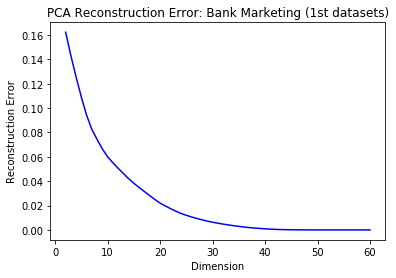

In [151]:
reconstruct_error_list = []
eigen_variance = []
for i in range(2, 61):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_reconstruct = pca.inverse_transform(X_train_pca)
    reconstruct_error =  ((X_train - X_reconstruct) ** 2).mean()
    reconstruct_error_list.append(reconstruct_error)
    variance = np.mean(pca.explained_variance_)
    eigen_variance.append(variance)
#     print("Components", i, " KURTOSIS", kurtosis_dat)


fig, ax = plt.subplots()
ax.plot( range(2, 61), reconstruct_error_list, "b-")
# ax.plot(range_loop , aic_score, "g-", label='AIC Score')
ax.set_xlabel('Dimension')
ax.set_ylabel('Reconstruction Error')
ax.set_title('PCA Reconstruction Error: Bank Marketing (1st datasets)')
# ax.legend()
plt.show(fig)

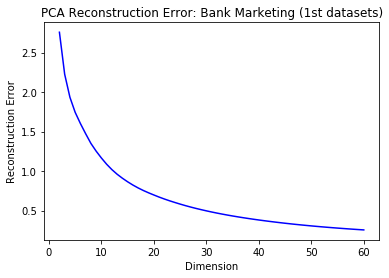

In [152]:
fig, ax = plt.subplots()
ax.plot( range(2, 61), eigen_variance, "b-")
# ax.plot(range_loop , aic_score, "g-", label='AIC Score')
ax.set_xlabel('Dimension')
ax.set_ylabel('Reconstruction Error')
ax.set_title('PCA Reconstruction Error: Bank Marketing (1st datasets)')
# ax.legend()
plt.show(fig)

In [180]:
# let say we use 5 Components!! 
final_pca = PCA(n_components=20)
final_pca.fit(X_train)
X_train_pca = final_pca.transform(X_train)

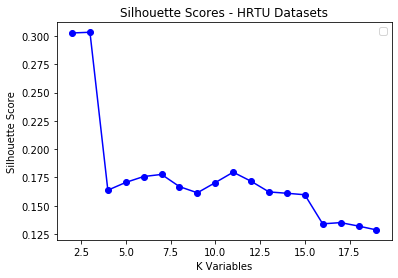

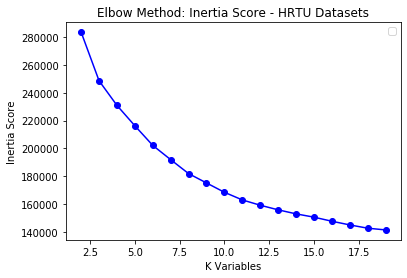

In [181]:
# Perform clustering again!!
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# k = 5
kmean_clfs_n = []
range_loop = range(2, 20)
for i in range_loop:
#     print("K", i)
    kmean = KMeans(n_clusters=i , random_state=random_state)
    kmean.fit(X_train_pca)
    kmean_clfs_n.append(kmean)

silhouette = [silhouette_score(X_train_pca, i.labels_) for i in kmean_clfs_n]
inertia = [ i.inertia_ for i in kmean_clfs_n]
fig, ax = plt.subplots()
ax.plot(range_loop , silhouette, "b-o")
ax.set_xlabel('K Variables')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores - HRTU Datasets')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(range_loop , inertia, "b-o")
ax.set_xlabel('K Variables')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method: Inertia Score - HRTU Datasets')
ax.legend()
plt.show(fig)
# Find meaningful part of Clustering via PCA!!

In [183]:
# from silhouette score, it is k = 2!!
kmean = KMeans(n_clusters=3, random_state=random_state)
kmean.fit(X_train_pca)

pca_cluster = kmean.predict(X_train_pca)
get_all_cluster_metric_score(pca_cluster, y_train)

SCORE
Homogenity: 0.1551471497279052
V Measure: 0.09920162504669004
Completeness: 0.07291039074402557
Adjusted RandIndex: 0.1625402913767712


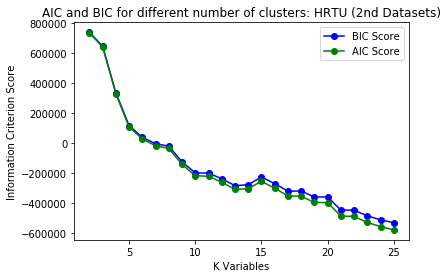

In [212]:
gm_clfs_n = []
range_loop = range(2, 26)
for i in range_loop:
#     print("K", i)
    gm = GaussianMixture(n_components=i , random_state=random_state)
    gm.fit(X_train_pca)
    gm_clfs_n.append(gm)


bic_score = [i.bic(X_train_pca) for i in gm_clfs_n]
aic_score = [i.aic(X_train_pca) for i in gm_clfs_n]
fig, ax = plt.subplots()
ax.plot(range_loop , bic_score, "b-o", label='BIC Score')
ax.plot(range_loop , aic_score, "g-o", label='AIC Score')
ax.set_xlabel('K Variables')
ax.set_ylabel('Information Criterion Score')
ax.set_title('AIC and BIC for different number of clusters: HRTU (2nd Datasets)')
ax.legend()
plt.show(fig)

In [211]:
gm = GaussianMixture(n_components=25, random_state=random_state)
gm.fit(X_train_pca)

y_pred_pca_gmm = gm.predict(X_train_pca)
# y_pred_gmm_prob = gm.predict_proba(X_train)
get_all_cluster_metric_score(y_pred_pca_gmm, y_train)

SCORE
Homogenity: 0.202826147808512
V Measure: 0.0432400859404245
Completeness: 0.024199571173475237
Adjusted RandIndex: 0.010520345410598781


## ICA using FAST ICA in SKLEARN

In [34]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
kurtosis_ica = []
for i in range(2, 60):
    ica = FastICA(n_components=i, random_state=random_state, max_iter=2000, tol=0.001)
    X_train_ica = ica.fit_transform(X_train)
    kurtosis_dat = np.mean(kurtosis(X_train_ica))
    kurtosis_ica.append(kurtosis_dat)
    print("Components", i, " KURTOSIS", kurtosis_dat)

Components 2  KURTOSIS 6.600208487189954
Components 3  KURTOSIS 6.711150158187177
Components 4  KURTOSIS 8.321335736871399
Components 5  KURTOSIS 7.64616820791111
Components 6  KURTOSIS 13.026701259123302
Components 7  KURTOSIS 11.090509382663447
Components 8  KURTOSIS 9.444878389719022
Components 9  KURTOSIS 9.809057424283786
Components 10  KURTOSIS 9.046082799243065


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 11  KURTOSIS 8.062626569091131
Components 12  KURTOSIS 7.846985529165226
Components 13  KURTOSIS 7.127701318429323
Components 14  KURTOSIS 6.722201648960213
Components 15  KURTOSIS 6.331409096957243
Components 16  KURTOSIS 5.7961891993661165
Components 17  KURTOSIS 5.4065475504734435
Components 18  KURTOSIS 4.884901304696761
Components 19  KURTOSIS 4.721294104515117
Components 20  KURTOSIS 4.551542451801259
Components 21  KURTOSIS 4.155888913379739
Components 22  KURTOSIS 4.296475215191649
Components 23  KURTOSIS 4.141548745503047
Components 24  KURTOSIS 3.7588212018220104
Components 25  KURTOSIS 4.107196212543339
Components 26  KURTOSIS 3.586611707838586
Components 27  KURTOSIS 3.9697906310026583
Components 28  KURTOSIS 4.113021806082265
Components 29  KURTOSIS 4.914498760707888
Components 30  KURTOSIS 4.691661107028571
Components 31  KURTOSIS 4.825176689475352
Components 32  KURTOSIS 5.483883342481498


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 33  KURTOSIS 6.06463806618156
Components 34  KURTOSIS 8.929632265069316


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 35  KURTOSIS 9.59660700348593
Components 36  KURTOSIS 9.86966379065759


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 37  KURTOSIS 10.440546309622315


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 38  KURTOSIS 11.642296088845974
Components 39  KURTOSIS 12.245868406659584
Components 40  KURTOSIS 12.787208114610383
Components 41  KURTOSIS 13.941019548799535
Components 42  KURTOSIS 15.779892270954198


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 43  KURTOSIS 18.297692159853803


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 44  KURTOSIS 22.364478449960515


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 45  KURTOSIS 28.635648723520895
Components 46  KURTOSIS 28.829903292477322
Components 47  KURTOSIS 39.61013876021281
Components 48  KURTOSIS 40.10597296755673


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 49  KURTOSIS 101.64324182948495
Components 50  KURTOSIS 375.4611155480194


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 51  KURTOSIS 200.43225801701013


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 52  KURTOSIS 157.57060701181035


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 53  KURTOSIS 150.5383575912913


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 54  KURTOSIS 161.14612349180067


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 55  KURTOSIS 166.2831391901189


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 56  KURTOSIS 165.0668736199364


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 57  KURTOSIS 138.46433063035877


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Components 58  KURTOSIS 145.64498792786236
Components 59  KURTOSIS 147.15876739988323


C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


No handles with labels found to put in legend.


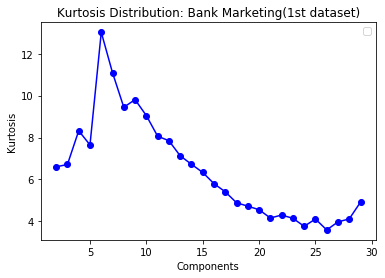

In [93]:
fig, ax = plt.subplots()
ax.plot(range(2, 30) , kurtosis_ica[0:28], "b-o")
ax.set_xlabel('Components')
ax.set_ylabel('Kurtosis')
ax.set_title('Kurtosis Distribution: Bank Marketing(1st dataset)')
ax.legend()
plt.show(fig)
# Maximize Variance are 6 components!!

In [186]:
# let say we use 5 Components!! 
ica_final = FastICA(n_components=6, random_state=random_state, max_iter=2000, tol=0.001)
X_train_ica = ica_final.fit_transform(X_train)

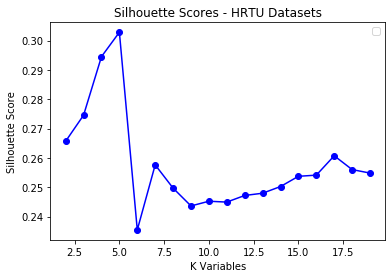

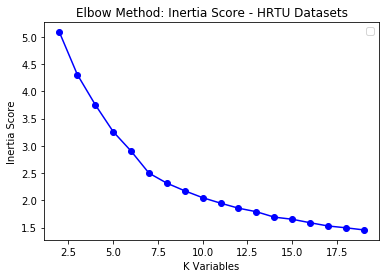

In [187]:
# Perform clustering again!!
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# k = 5
kmean_clfs_n = []
range_loop = range(2, 20)
for i in range_loop:
#     print("K", i)
    kmean = KMeans(n_clusters=i , random_state=random_state)
    kmean.fit(X_train_ica)
    kmean_clfs_n.append(kmean)

silhouette = [silhouette_score(X_train_ica, i.labels_) for i in kmean_clfs_n]
inertia = [ i.inertia_ for i in kmean_clfs_n]
fig, ax = plt.subplots()
ax.plot(range_loop , silhouette, "b-o")
ax.set_xlabel('K Variables')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores - HRTU Datasets')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(range_loop , inertia, "b-o")
ax.set_xlabel('K Variables')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method: Inertia Score - HRTU Datasets')
ax.legend()
plt.show(fig)
# Find meaningful part of Clustering via PCA!!

In [210]:
kmean = KMeans(n_clusters=5 , random_state=random_state)
kmean.fit(X_train_ica)

ica_cluster = kmean.predict(X_train_ica)
get_all_cluster_metric_score(ica_cluster, y_train)

SCORE
Homogenity: 0.3030780821556251
V Measure: 0.14391809701394379
Completeness: 0.09436354103310664
Adjusted RandIndex: 0.17914616602316544


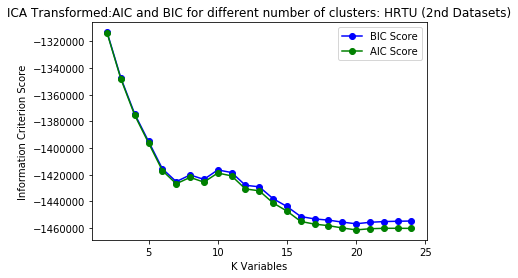

In [191]:
gm_clfs_n = []
range_loop = range(2, 25)
for i in range_loop:
#     print("K", i)
    gm = GaussianMixture(n_components=i , random_state=random_state)
    gm.fit(X_train_ica)
    gm_clfs_n.append(gm)


bic_score = [i.bic(X_train_ica) for i in gm_clfs_n]
aic_score = [i.aic(X_train_ica) for i in gm_clfs_n]
fig, ax = plt.subplots()
ax.plot(range_loop , bic_score, "b-o", label='BIC Score')
ax.plot(range_loop , aic_score, "g-o", label='AIC Score')
ax.set_xlabel('K Variables')
ax.set_ylabel('Information Criterion Score')
ax.set_title('ICA Transformed:AIC and BIC for different number of clusters: HRTU (2nd Datasets)')
ax.legend()
plt.show(fig)

In [209]:
gm = GaussianMixture(n_components=20, random_state=random_state)
gm.fit(X_train_ica)

y_pred_ica_gmm = gm.predict(X_train_ica)
# y_pred_gmm_prob = gm.predict_proba(X_train)
get_all_cluster_metric_score(y_pred_ica_gmm, y_train)

SCORE
Homogenity: 0.32473689317138865
V Measure: 0.08122236495973979
Completeness: 0.046415895254364056
Adjusted RandIndex: 0.04903696241322736


## Randomized Projection

In [50]:
from sklearn.random_projection import GaussianRandomProjection, johnson_lindenstrauss_min_dim, SparseRandomProjection
rand_pj = GaussianRandomProjection(n_components=30)
rand_pj.fit(X_train)
X_train_rand_pj  = rand_pj.transform(X_train)

def reconstruct_rp(X_transformed, rand_proj,X_train):
    return (X_transformed.dot(rand_proj.components_) + np.mean(X_train, axis=0))

X_reconstructed = reconstruct_rp(X_train_rand_pj, rand_pj, X_train)

reconstruction_error = np.mean((X_train - X_reconstructed)**2)

In [51]:
def run_randomized_projection():
    contruct_err = []
    for i in range(2, 60):
        rand_pj = GaussianRandomProjection(n_components=i)
        rand_pj.fit(X_train)
        X_trainsformed = rand_pj.transform(X_train)
        X_reconstructed = reconstruct_rp(X_trainsformed, rand_pj, X_train)
        error = np.mean((X_train - X_reconstructed)**2)
        contruct_err.append(error)
    return contruct_err

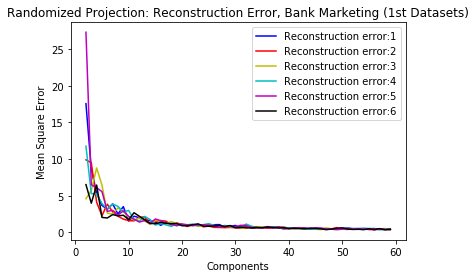

In [105]:
fig, ax = plt.subplots()
color = ['b-', 'r-', 'y-', 'c-', 'm-', 'k-']
for i in range(0, 6):
    new_err = run_randomized_projection()
    ax.plot(range(2, 60) , new_err,color[i], label=f'Reconstruction error:{i+1}')
ax.set_xlabel('Components')
ax.set_ylabel('Mean Square Error')
ax.set_title('Randomized Projection: Reconstruction Error, Bank Marketing (1st Datasets)')
ax.legend()
plt.show(fig)

No handles with labels found to put in legend.


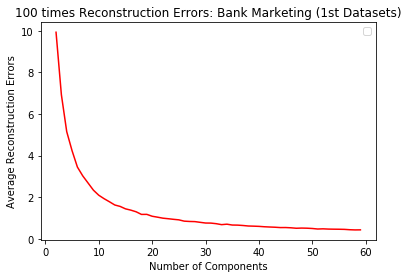

In [106]:
# 100 times letsay
error_list = []
for i in range(2, 60):
    contruct_err = []
    for j in range(1, 101):
        rand_pj = GaussianRandomProjection(n_components=i)
        rand_pj.fit(X_train)
        X_trainsformed = rand_pj.transform(X_train)
        X_reconstructed = reconstruct_rp(X_trainsformed, rand_pj, X_train)
        error = np.mean((X_train - X_reconstructed)**2)
        contruct_err.append(error)
    error_list.append(np.mean(contruct_err))
    
fig, ax = plt.subplots()
ax.plot(range(2, 60) , error_list, "r-")
ax.set_xlabel('Number of Components')
ax.set_ylabel('Average Reconstruction Errors')
ax.set_title('100 times Reconstruction Errors: Bank Marketing (1st Datasets)')
ax.legend()
plt.show(fig)

In [231]:
# final rpj components
final_rpj = GaussianRandomProjection(n_components=20)
final_rpj.fit(X_train)
X_train_rpj = final_rpj.transform(X_train)

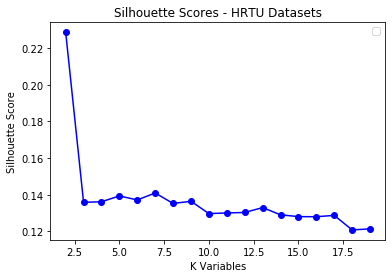

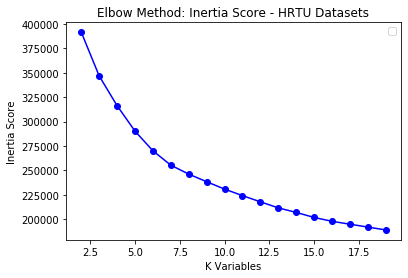

In [192]:
# Perform clustering again!!
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# k = 5
kmean_clfs_n = []
range_loop = range(2, 20)
for i in range_loop:
#     print("K", i)
    kmean = KMeans(n_clusters=i , random_state=random_state)
    kmean.fit(X_train_rpj)
    kmean_clfs_n.append(kmean)

silhouette = [silhouette_score(X_train_rpj, i.labels_) for i in kmean_clfs_n]
inertia = [ i.inertia_ for i in kmean_clfs_n]
fig, ax = plt.subplots()
ax.plot(range_loop , silhouette, "b-o")
ax.set_xlabel('K Variables')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores - HRTU Datasets')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(range_loop , inertia, "b-o")
ax.set_xlabel('K Variables')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method: Inertia Score - HRTU Datasets')
ax.legend()
plt.show(fig)
# Find meaningful part of Clustering via PCA!!

In [232]:
kmean_rpj = KMeans(n_clusters=2 , random_state=random_state)
kmean_rpj.fit(X_train_rpj)

rpj_cluster = kmean_rpj.predict(X_train_rpj)
get_all_cluster_metric_score(rpj_cluster, y_train)

SCORE
Homogenity: 0.10301946476936379
V Measure: 0.07279549450773934
Completeness: 0.05628309477359506
Adjusted RandIndex: 0.1147152117389721


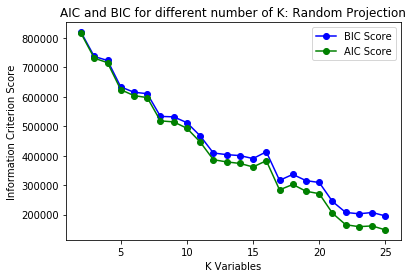

In [207]:
from sklearn.mixture import GaussianMixture

# gm = GaussianMixture(n_components=3, random_state=random_state)
# gm.fit(X_train_ica)

gm_clfs_n = []
range_loop = range(2, 26)
for i in range_loop:
#     print("K", i)
    gm = GaussianMixture(n_components=i , random_state=random_state)
    gm.fit(X_train_rpj)
    gm_clfs_n.append(gm)

bic_score = [i.bic(X_train_rpj) for i in gm_clfs_n]
aic_score = [i.aic(X_train_rpj) for i in gm_clfs_n]
fig, ax = plt.subplots()
ax.plot(range_loop , bic_score, "b-o", label='BIC Score')
ax.plot(range_loop , aic_score, "g-o", label='AIC Score')
ax.set_xlabel('K Variables')
ax.set_ylabel('Information Criterion Score')
ax.set_title('AIC and BIC for different number of K: Random Projection')
ax.legend()
plt.show(fig)

In [208]:
gm = GaussianMixture(n_components=25, random_state=random_state)
gm.fit(X_train_rpj)

y_pred_rpj_gmm = gm.predict(X_train_rpj)
# y_pred_gmm_prob = gm.predict_proba(X_train)
get_all_cluster_metric_score(y_pred_rpj_gmm, y_train)

SCORE
Homogenity: 0.20180054038967143
V Measure: 0.0423139131119527
Completeness: 0.023634856967449352
Adjusted RandIndex: 0.011475497247874533


## Neural Networks with Feature Transformation

In [196]:
def run_neural_networks(X_train, y_train, X_test, y_test):
    param_grid = [{
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes':[(10,), (10,2), (10,4), (10, 8), (10, 16), (10, 32)]
    }]

    ann_clf = MLPClassifier(solver='adam', max_iter=300, random_state=random_state)
    ann_grid_clf = GridSearchCV(ann_clf, param_grid, cv=5,
                               scoring='f1', return_train_score=True)
    
    ann_grid_clf.fit(X_train, y_train)
    ann_grid_clf_best = ann_grid_clf.best_estimator_
    start_time = time.time()
    ann_grid_clf_best.fit(X_train, y_train)
    stop_time = time.time()
    print(f"Fit time: {stop_time - start_time} seconds")
    pred_ann_train = ann_grid_clf_best.predict(X_train)
    pred_ann = ann_grid_clf_best.predict(X_test)
    print("Train Performance:", get_all_metrics_score(pred_ann_train, y_train))
    print("Test Performance:", get_all_metrics_score(pred_ann, y_test))
    print("Best Model:", ann_grid_clf_best)
    return ann_grid_clf.best_estimator_

In [197]:
nn_original = run_neural_networks(X_train, y_train, X_test, y_test)

C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

Fit time: 15.435727596282959 seconds
SCORE
Accuracy: 0.9217974270701214
Precision: 0.5794392523364486
Recall: 0.6782346284420974
F1 Score: 0.6249565519638512
ROC AUC: 0.8129587189676811
Train Performance: None
SCORE
Accuracy: 0.9159126020745972
Precision: 0.5517241379310345
Recall: 0.6513056835637481
F1 Score: 0.597393448397323
ROC AUC: 0.7976242029404453
Test Performance: None
Best Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [234]:
# let say we use 4 Components!! (Retain >=90% Variances)
final_pca = PCA(n_components=20)
final_pca.fit(X_train)
X_train_pca = final_pca.transform(X_train)
X_test_pca = final_pca.transform(X_test)

pca_nn = run_neural_networks(X_train_pca, y_train, X_test_pca, y_test)

Fit time: 18.24621272087097 seconds
SCORE
Accuracy: 0.9175212900887842
Precision: 0.5652594263615855
Recall: 0.6542334949645655
F1 Score: 0.6065006915629322
ROC AUC: 0.800043615909673
Train Performance: None
SCORE
Accuracy: 0.9130434782608695
Precision: 0.5517241379310345
Recall: 0.6323639075316928
F1 Score: 0.5892981236970117
ROC AUC: 0.7880640954569987
Test Performance: None
Best Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 16), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [199]:
# ICA
# So we choose ICA components according to Maxium Kurtosis, which is 8
final_ica = FastICA(n_components=6, random_state=random_state)
final_ica.fit(X_train)
X_train_ica = final_ica.transform(X_train)
X_test_ica = final_ica.transform(X_test)

ica_nn = run_neural_networks(X_train_ica, y_train, X_test_ica, y_test)

Fit time: 5.799595594406128 seconds
SCORE
Accuracy: 0.9057437941656097
Precision: 0.515630035449565
Recall: 0.5930318754633062
F1 Score: 0.5516290294776763
ROC AUC: 0.7663315781702602
Train Performance: None
SCORE
Accuracy: 0.9062017214742882
Precision: 0.5283018867924528
Recall: 0.5961820851688693
F1 Score: 0.5601931700586409
ROC AUC: 0.7684532370084391
Test Performance: None
Best Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [235]:
# RPJ
final_rpj = GaussianRandomProjection(n_components=20)
final_rpj.fit(X_train)
X_train_rpj = final_rpj.transform(X_train)
X_test_rpj = final_rpj.transform(X_test)

rpj_nn = run_neural_networks(X_train_rpj, y_train, X_test_rpj, y_test)

Fit time: 7.818096399307251 seconds
SCORE
Accuracy: 0.913535060699402
Precision: 0.48050273928456333
Recall: 0.6582781456953642
F1 Score: 0.5555141579731744
ROC AUC: 0.7973190965350094
Train Performance: None
SCORE
Accuracy: 0.9103950562789671
Precision: 0.4664931685100846
Recall: 0.6430493273542601
F1 Score: 0.5407239819004525
ROC AUC: 0.7886668338967165
Test Performance: None
Best Model: MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


## Neural Networks with Clustering

In [201]:
def combine_data_w_cluser(feature_array, cluster_array):
    data_w_cluster = np.c_[feature_array, cluster_array]
    df_data_w_cluster = pd.DataFrame(data_w_cluster)
    feature_array_new = df_data_w_cluster.drop(df_data_w_cluster.columns[-1])
    job_encoder = OneHotEncoder()
    cluster_one_hot = job_encoder.fit_transform(df_data_w_cluster[[df_data_w_cluster.columns[-1]]])
#     feature_array_new = feature_array.drop()
    final_feature_with_cluster = np.concatenate((feature_array ,cluster_one_hot.toarray()),axis=1)
    return final_feature_with_cluster

In [202]:
fin_kmeans = KMeans(n_clusters=3, random_state=random_state)
fin_kmeans.fit(X_train)

y_pred_kmeans_train = fin_kmeans.predict(X_train)
y_pred_kmeans_test = fin_kmeans.predict(X_test)

X_train_kmean = combine_data_w_cluser(X_train, y_pred_kmeans_train)
X_test_kmean = combine_data_w_cluser(X_test, y_pred_kmeans_test)

optimal_kmean_model = run_neural_networks(X_train_kmean, y_train, X_test_kmean, y_test)

C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

Fit time: 12.745920419692993 seconds
SCORE
Accuracy: 0.9244790722957057
Precision: 0.6374476313245246
Recall: 0.6734763363976847
F1 Score: 0.6549668874172185
ROC AUC: 0.8139260990934811
Train Performance: None
SCORE
Accuracy: 0.9139998528654455
Precision: 0.6005204944697463
Recall: 0.6244925575101489
F1 Score: 0.6122719734660034
ROC AUC: 0.7869057917554871
Test Performance: None
Best Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [203]:
gm = GaussianMixture(n_components=23, random_state=random_state)
gm.fit(features)

y_pred_gmm_train = gm.predict(X_train)
y_pred_gmm_test = gm.predict(X_test)

X_train_gmm =  combine_data_w_cluser(X_train, y_pred_gmm_train)
X_test_gmm = combine_data_w_cluser(X_test, y_pred_gmm_test)
optimal_gmm_model = run_neural_networks(X_train_gmm, y_train, X_test_gmm, y_test)

C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

Fit time: 12.26420783996582 seconds
SCORE
Accuracy: 0.9234281572748686
Precision: 0.6732194650338382
Recall: 0.6552697616060226
F1 Score: 0.6641233508186297
ROC AUC: 0.8068621516679271
Train Performance: None
SCORE
Accuracy: 0.9137055837563451
Precision: 0.6395575797007157
Recall: 0.6136079900124844
F1 Score: 0.626314112774769
ROC AUC: 0.7837033361787883
Test Performance: None
Best Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


## Factor Analysis

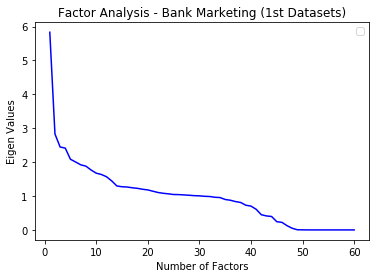

In [166]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(X_train)
ev, v = fa.get_eigenvalues()
# fa.get_eigenvalues()
fig, ax = plt.subplots()
ax.plot(range(1, ev.shape[0]+1) , ev, "b-")
ax.set_xlabel('Number of Factors')
ax.set_ylabel('Eigen Values')
ax.set_title('Factor Analysis - Bank Marketing (1st Datasets)')
ax.legend()
plt.show(fig)

In [224]:
# 20 factor!!
fa = FactorAnalyzer(n_factors=20)
fa.fit(X_train)
X_train_fa = fa.transform(X_train)

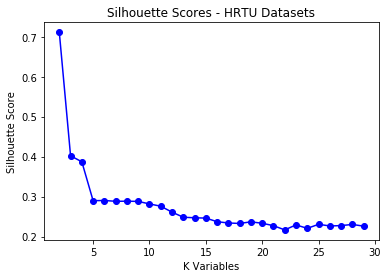

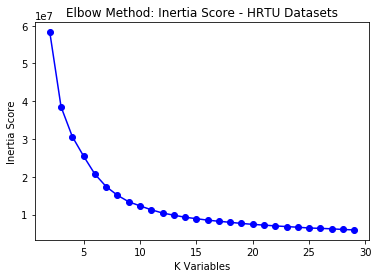

In [173]:
# Perform clustering again!!
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# k = 5
kmean_clfs_n = []
range_loop = range(2, 30)
for i in range_loop:
#     print("K", i)
    kmean = KMeans(n_clusters=i , random_state=random_state)
    kmean.fit(X_train_fa)
    kmean_clfs_n.append(kmean)

    
silhouette = [silhouette_score(X_train_fa, i.labels_) for i in kmean_clfs_n]
inertia = [ i.inertia_ for i in kmean_clfs_n]
fig, ax = plt.subplots()
ax.plot(range_loop , silhouette, "b-o")
ax.set_xlabel('K Variables')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores - HRTU Datasets')
# ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(range_loop , inertia, "b-o")
ax.set_xlabel('K Variables')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method: Inertia Score - HRTU Datasets')
# ax.legend()
plt.show(fig)

In [225]:
# from silhouette score, it is k = 2!!
kmean = KMeans(n_clusters=2, random_state=random_state)
kmean.fit(X_train_fa)

fa_cluster = kmean.predict(X_train_fa)
get_all_cluster_metric_score(fa_cluster, y_train)

SCORE
Homogenity: 0.033708412459683555
V Measure: 0.04709346624172033
Completeness: 0.07810943109408833
Adjusted RandIndex: 0.1364548811141531


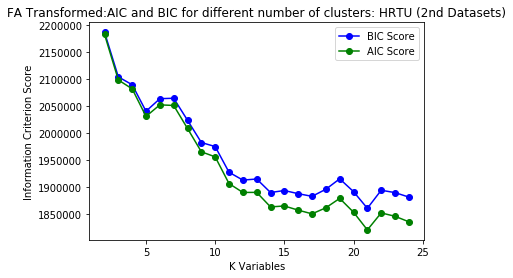

In [175]:
# GMM
gm_clfs_n = []
range_loop = range(2, 25)
for i in range_loop:
#     print("K", i)
    gm = GaussianMixture(n_components=i , random_state=random_state)
    gm.fit(X_train_fa)
    gm_clfs_n.append(gm)


bic_score = [i.bic(X_train_fa) for i in gm_clfs_n]
aic_score = [i.aic(X_train_fa) for i in gm_clfs_n]
fig, ax = plt.subplots()
ax.plot(range_loop , bic_score, "b-o", label='BIC Score')
ax.plot(range_loop , aic_score, "g-o", label='AIC Score')
ax.set_xlabel('K Variables')
ax.set_ylabel('Information Criterion Score')
ax.set_title('FA Transformed:AIC and BIC for different number of clusters: HRTU (2nd Datasets)')
ax.legend()
plt.show(fig)

In [227]:
gm = GaussianMixture(n_components=21, random_state=random_state)
gm.fit(X_train_fa)

y_pred_fa_gmm = gm.predict(X_train_fa)
# y_pred_gmm_prob = gm.predict_proba(X_train)
get_all_cluster_metric_score(y_pred_fa_gmm, y_train)

SCORE
Homogenity: 0.15961012860071883
V Measure: 0.03716365896305658
Completeness: 0.02103016353247487
Adjusted RandIndex: 0.01354445356750695


In [177]:
final_fa = FactorAnalyzer(n_factors=20)
final_fa.fit(X_train)
# X_train_fa = fa.transform(X_train)
X_train_fa = final_rpj.transform(X_train)
X_test_fa = final_rpj.transform(X_test)

run_neural_networks(X_train_fa, y_train, X_test_fa, y_test)

Fit time: 7.6834557056427 seconds
SCORE
Accuracy: 0.913426345352419
Precision: 0.5098291975507573
Recall: 0.6457142857142857
F1 Score: 0.5697820997658923
ROC AUC: 0.7926125614294236
Train Performance: None
SCORE
Accuracy: 0.9112042963289929
Precision: 0.5094339622641509
Recall: 0.633495145631068
F1 Score: 0.56473133790119
ROC AUC: 0.786238549589832
Test Performance: None
Best Model: MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)